In [1]:
# dataset https://finance.yahoo.com/quote/BTC-USD/history?p=BTC-USD

In [2]:
# Modul os menyediakan fungsi untuk berinteraksi dengan sistem operasi
import os

# Modul path dari os menyediakan fungsi-fungsi untuk bekerja dengan path (alamat file atau direktori) dalam sistem operasi
from os import path

# Modul numpy digunakan untuk operasi matematika dan manipulasi array
import numpy as np

# Modul pandas digunakan untuk manipulasi dan analisis data
import pandas as pd

# Modul yfinance digunakan untuk mengambil data historis harga saham dan cryptocurrency dari Yahoo Finance
import yfinance as yf

# Modul streamlit digunakan untuk membuat aplikasi web interaktif dengan mudah menggunakan Python
import streamlit as st

# Modul datetime digunakan untuk bekerja dengan tanggal dan waktu dalam Python
from datetime import datetime

# Modul pandas_datareader digunakan untuk mengambil data keuangan dari berbagai sumber
import pandas_datareader as data
import pandas_datareader.data as web

# Modul math menyediakan fungsi matematika yang lebih kompleks
import math

# Modul re digunakan untuk melakukan operasi regular expression dalam Python
import re

# Modul matplotlib.pyplot digunakan untuk membuat visualisasi data dalam bentuk grafik
import matplotlib.pyplot as plt
import matplotlib.dates as mdates
%matplotlib inline 

import mplfinance as mpf

# Modul MinMaxScaler dari sklearn.preprocessing digunakan untuk melakukan normalisasi data ke dalam rentang yang telah ditentukan
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import mean_absolute_percentage_error
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import cross_val_score

# Modul Sequential dari keras.models digunakan untuk membuat model neural network secara berurutan
from keras.models import Sequential

# Modul LSTM dan Dense dari keras.layers digunakan untuk menambahkan layer LSTM dan Dense pada model neural network
from keras.layers import Dense, Dropout, LSTM
from keras.layers import Reshape
from tensorflow.keras.layers import LSTM, Dense, Dropout
from tensorflow.keras.models import Sequential, load_model

# Modul web dari pandas_datareader digunakan untuk mengambil data keuangan dari berbagai sumber secara spesifik
from pandas_datareader import data as pdr

In [3]:
# Cek apakah file CSV tersedia di folder yang sama dengan script
csv_dataset = "BTC-USD.csv"
if os.path.isfile(csv_dataset):
    df = pd.read_csv(csv_dataset)
    # Konversi kolom 'Date' menjadi tipe data datetime jika diperlukan
    if 'Date' in df.columns:
        df['Date'] = pd.to_datetime(df['Date'])
else:
    # Jika file CSV tidak tersedia, ambil data dari Yahoo Finance
    start = '2014-09-17'
    end = '2023-12-31'
    df = yf.download('BTC-USD', start=start, end=end)
    # Simpan data ke file CSV untuk digunakan di masa mendatang
    df.to_csv(csv_dataset)

# Tampilkan lima baris pertama dari dataframe
print(df.head())

        Date        Open        High         Low       Close   Adj Close  \
0 2014-09-17  465.864014  468.174011  452.421997  457.334015  457.334015   
1 2014-09-18  456.859985  456.859985  413.104004  424.440002  424.440002   
2 2014-09-19  424.102997  427.834991  384.532013  394.795990  394.795990   
3 2014-09-20  394.673004  423.295990  389.882996  408.903992  408.903992   
4 2014-09-21  408.084991  412.425995  393.181000  398.821014  398.821014   

     Volume  
0  21056800  
1  34483200  
2  37919700  
3  36863600  
4  26580100  


In [4]:
start = '2014-09-17'
end = '2023-12-31'

df = yf.download('BTC-USD', start=start, end=end)
df.head()

[*********************100%%**********************]  1 of 1 completed


,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2014-09-17,465.864014,468.174011,452.421997,457.334015,457.334015,21056800
2014-09-18,456.859985,456.859985,413.104004,424.440002,424.440002,34483200
2014-09-19,424.102997,427.834991,384.532013,394.795990,394.795990,37919700
2014-09-20,394.673004,423.295990,389.882996,408.903992,408.903992,36863600
2014-09-21,408.084991,412.425995,393.181000,398.821014,398.821014,26580100


In [5]:
df.tail()

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2023-12-26,43599.847656,43603.175781,41676.488281,42520.402344,42520.402344,30026850982
2023-12-27,42518.468750,43683.160156,42167.582031,43442.855469,43442.855469,25260941032
2023-12-28,43468.199219,43804.781250,42318.550781,42627.855469,42627.855469,22992093014
2023-12-29,42614.644531,43124.324219,41424.062500,42099.402344,42099.402344,26000021055
2023-12-30,42091.753906,42584.125000,41556.226562,42156.902344,42156.902344,16013925945


In [6]:
df = df.reset_index()
df.head()

,Date,Open,High,Low,Close,Adj Close,Volume
0,2014-09-17,465.864014,468.174011,452.421997,457.334015,457.334015,21056800
1,2014-09-18,456.859985,456.859985,413.104004,424.440002,424.440002,34483200
2,2014-09-19,424.102997,427.834991,384.532013,394.795990,394.795990,37919700
3,2014-09-20,394.673004,423.295990,389.882996,408.903992,408.903992,36863600
4,2014-09-21,408.084991,412.425995,393.181000,398.821014,398.821014,26580100


In [7]:
df

,Date,Open,High,Low,Close,Adj Close,Volume
0,2014-09-17,465.864014,468.174011,452.421997,457.334015,457.334015,21056800
1,2014-09-18,456.859985,456.859985,413.104004,424.440002,424.440002,34483200
2,2014-09-19,424.102997,427.834991,384.532013,394.795990,394.795990,37919700
3,2014-09-20,394.673004,423.295990,389.882996,408.903992,408.903992,36863600
4,2014-09-21,408.084991,412.425995,393.181000,398.821014,398.821014,26580100
...,...,...,...,...,...,...,...
3387,2023-12-26,43599.847656,43603.175781,41676.488281,42520.402344,42520.402344,30026850982
3388,2023-12-27,42518.468750,43683.160156,42167.582031,43442.855469,43442.855469,25260941032
3389,2023-12-28,43468.199219,43804.781250,42318.550781,42627.855469,42627.855469,22992093014
3390,2023-12-29,42614.644531,43124.324219,41424.062500,42099.402344,42099.402344,26000021055


In [8]:
df = df.drop(['Adj Close'], axis = 1)
df.head()

,Date,Open,High,Low,Close,Volume
0,2014-09-17,465.864014,468.174011,452.421997,457.334015,21056800
1,2014-09-18,456.859985,456.859985,413.104004,424.440002,34483200
2,2014-09-19,424.102997,427.834991,384.532013,394.795990,37919700
3,2014-09-20,394.673004,423.295990,389.882996,408.903992,36863600
4,2014-09-21,408.084991,412.425995,393.181000,398.821014,26580100


In [9]:
df

,Date,Open,High,Low,Close,Volume
0,2014-09-17,465.864014,468.174011,452.421997,457.334015,21056800
1,2014-09-18,456.859985,456.859985,413.104004,424.440002,34483200
2,2014-09-19,424.102997,427.834991,384.532013,394.795990,37919700
3,2014-09-20,394.673004,423.295990,389.882996,408.903992,36863600
4,2014-09-21,408.084991,412.425995,393.181000,398.821014,26580100
...,...,...,...,...,...,...
3387,2023-12-26,43599.847656,43603.175781,41676.488281,42520.402344,30026850982
3388,2023-12-27,42518.468750,43683.160156,42167.582031,43442.855469,25260941032
3389,2023-12-28,43468.199219,43804.781250,42318.550781,42627.855469,22992093014
3390,2023-12-29,42614.644531,43124.324219,41424.062500,42099.402344,26000021055


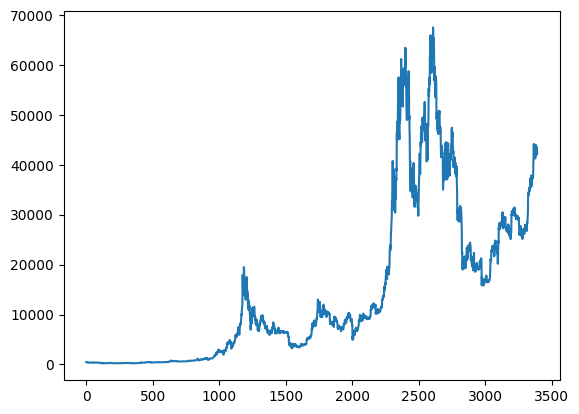

In [10]:
plt.plot(df.Close)

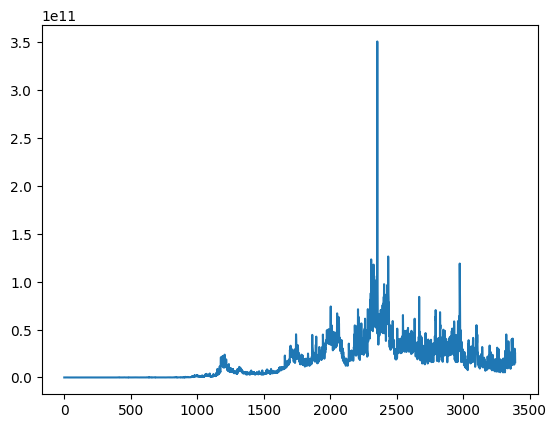

In [11]:
plt.plot(df.Volume)

In [12]:
df

,Date,Open,High,Low,Close,Volume
0,2014-09-17,465.864014,468.174011,452.421997,457.334015,21056800
1,2014-09-18,456.859985,456.859985,413.104004,424.440002,34483200
2,2014-09-19,424.102997,427.834991,384.532013,394.795990,37919700
3,2014-09-20,394.673004,423.295990,389.882996,408.903992,36863600
4,2014-09-21,408.084991,412.425995,393.181000,398.821014,26580100
...,...,...,...,...,...,...
3387,2023-12-26,43599.847656,43603.175781,41676.488281,42520.402344,30026850982
3388,2023-12-27,42518.468750,43683.160156,42167.582031,43442.855469,25260941032
3389,2023-12-28,43468.199219,43804.781250,42318.550781,42627.855469,22992093014
3390,2023-12-29,42614.644531,43124.324219,41424.062500,42099.402344,26000021055


In [13]:
df.tail()

,Date,Open,High,Low,Close,Volume
3387,2023-12-26,43599.847656,43603.175781,41676.488281,42520.402344,30026850982
3388,2023-12-27,42518.468750,43683.160156,42167.582031,43442.855469,25260941032
3389,2023-12-28,43468.199219,43804.781250,42318.550781,42627.855469,22992093014
3390,2023-12-29,42614.644531,43124.324219,41424.062500,42099.402344,26000021055
3391,2023-12-30,42091.753906,42584.125000,41556.226562,42156.902344,16013925945


In [14]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler(feature_range=(0,1))

In [15]:
ma100 = df.Close.rolling(100).mean()

# Menghilangkan baris yang mengandung nilai NaN
ma100_cleaned = ma100.dropna()

# Atau, jika Anda ingin mengisi nilai NaN
# ma100_filled = ma100.fillna(method='ffill')

# Periksa hasil
print(ma100_cleaned)

# Jika Anda mengisi nilai NaN, gunakan ini:
# print(ma100_filled)

# Menampilkan beberapa baris pertama dari ma100_cleaned untuk memastikan tidak ada nilai NaN
ma100_cleaned.head()

99        366.468409
100       365.174309
101       364.088539
102       363.312970
103       362.350630
            ...     
3387    34735.296465
3388    34902.182207
3389    35056.349590
3390    35206.023535
3391    35361.916230
Name: Close, Length: 3293, dtype: float64


99     366.468409
100    365.174309
101    364.088539
102    363.312970
103    362.350630
Name: Close, dtype: float64

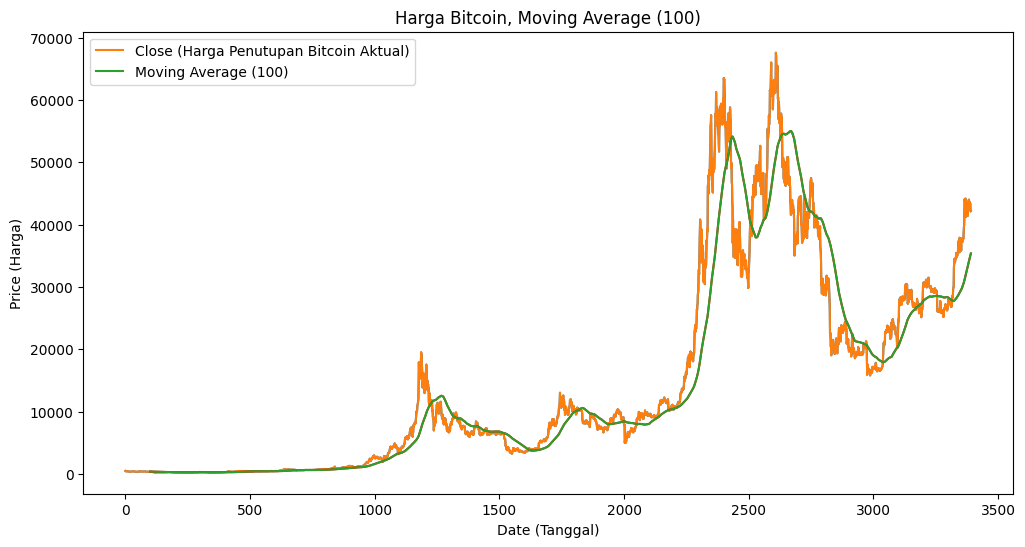

In [16]:
plt.figure(figsize = (12,6))
plt.plot(df.Close)
plt.plot(df['Close'], label='Close (Harga Penutupan Bitcoin Aktual)')
plt.plot(ma100, 'r')
plt.plot(ma100_cleaned, label='Moving Average (100)')
plt.title('Harga Bitcoin, Moving Average (100)')
plt.xlabel('Date (Tanggal)')
plt.ylabel('Price (Harga)')
plt.legend()
plt.show()

In [17]:
ma200 = df.Close.rolling(200).mean()

# Menghilangkan baris yang mengandung nilai NaN
ma200_cleaned = ma200.dropna()

# Atau, jika Anda ingin mengisi nilai NaN
# ma200_filled = ma200.fillna(method='ffill')

# Periksa hasil
print(ma200_cleaned)

# Jika Anda mengisi nilai NaN, gunakan ini:
# print(ma200_filled)

# Menampilkan beberapa baris pertama dari ma200_cleaned untuk memastikan tidak ada nilai NaN
ma200_cleaned.head()

199       310.843170
200       309.859490
201       309.014750
202       308.306670
203       307.487260
            ...     
3387    31516.900771
3388    31604.858848
3389    31688.297285
3390    31769.281797
3391    31850.472666
Name: Close, Length: 3193, dtype: float64


199    310.84317
200    309.85949
201    309.01475
202    308.30667
203    307.48726
Name: Close, dtype: float64

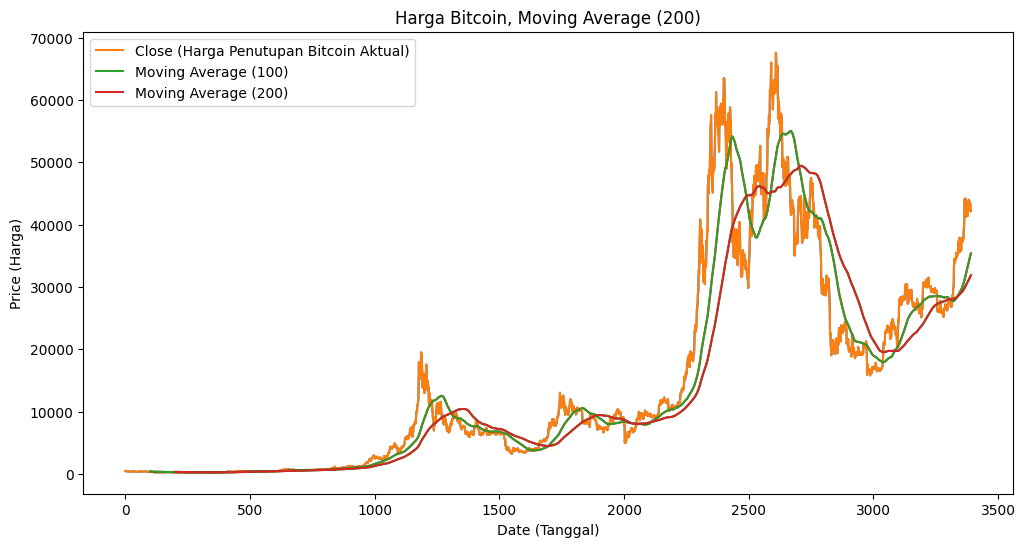

In [18]:
plt.figure(figsize = (12,6))
plt.plot(df.Close)
plt.plot(df['Close'], label='Close (Harga Penutupan Bitcoin Aktual)')
plt.plot(ma100, 'r')
plt.plot(ma100_cleaned, label='Moving Average (100)')
plt.title('Harga Bitcoin, Moving Average (100)')
plt.xlabel('Date (Tanggal)')
plt.ylabel('Price (Harga)')
plt.plot(ma200, 'g')
plt.plot(ma200_cleaned, label='Moving Average (200)')
plt.title('Harga Bitcoin, Moving Average (200)')
plt.xlabel('Date (Tanggal)')
plt.ylabel('Price (Harga)')
plt.legend()
plt.show()

In [19]:
ma100 = df.Volume.rolling(100).mean()

# Menghilangkan baris yang mengandung nilai NaN
ma100_cleaned = ma100.dropna()

# Atau, jika Anda ingin mengisi nilai NaN
# ma100_filled = ma100.fillna(method='ffill')

# Periksa hasil
print(ma100_cleaned)

# Jika Anda mengisi nilai NaN, gunakan ini:
# print(ma100_filled)

# Menampilkan beberapa baris pertama dari ma100_cleaned untuk memastikan tidak ada nilai NaN
ma100_cleaned.head()

99      2.444665e+07
100     2.440019e+07
101     2.420721e+07
102     2.394478e+07
103     2.369917e+07
            ...     
3387    1.808090e+10
3388    1.817735e+10
3389    1.826920e+10
3390    1.839638e+10
3391    1.842281e+10
Name: Volume, Length: 3293, dtype: float64


99     24446651.2
100    24400188.2
101    24207208.2
102    23944777.2
103    23699166.2
Name: Volume, dtype: float64

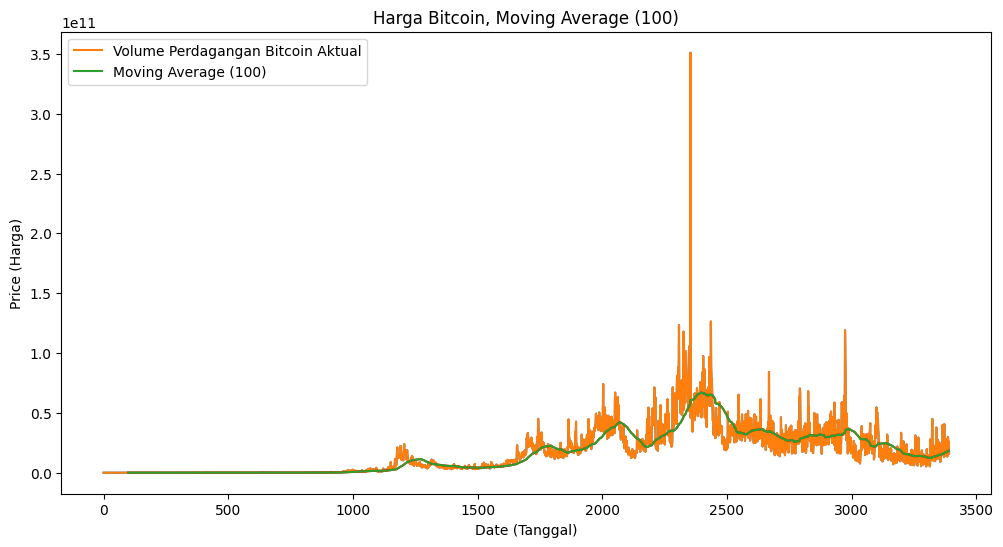

In [20]:
plt.figure(figsize = (12,6))
plt.plot(df.Volume)
plt.plot(df['Volume'], label='Volume Perdagangan Bitcoin Aktual')
plt.plot(ma100, 'r')
plt.plot(ma100_cleaned, label='Moving Average (100)')
plt.title('Harga Bitcoin, Moving Average (100)')
plt.xlabel('Date (Tanggal)')
plt.ylabel('Price (Harga)')
plt.legend()
plt.show()

In [21]:
ma200 = df.Volume.rolling(200).mean()

# Menghilangkan baris yang mengandung nilai NaN
ma200_cleaned = ma200.dropna()

# Atau, jika Anda ingin mengisi nilai NaN
# ma200_filled = ma200.fillna(method='ffill')

# Periksa hasil
print(ma200_cleaned)

# Jika Anda mengisi nilai NaN, gunakan ini:
# print(ma200_filled)

# Menampilkan beberapa baris pertama dari ma200_cleaned untuk memastikan tidak ada nilai NaN
ma200_cleaned.head()

199     2.690465e+07
200     2.689761e+07
201     2.682537e+07
202     2.672811e+07
203     2.669422e+07
            ...     
3387    1.584247e+10
3388    1.586941e+10
3389    1.593070e+10
3390    1.600231e+10
3391    1.601167e+10
Name: Volume, Length: 3193, dtype: float64


199    26904649.66
200    26897611.66
201    26825366.66
202    26728105.16
203    26694219.16
Name: Volume, dtype: float64

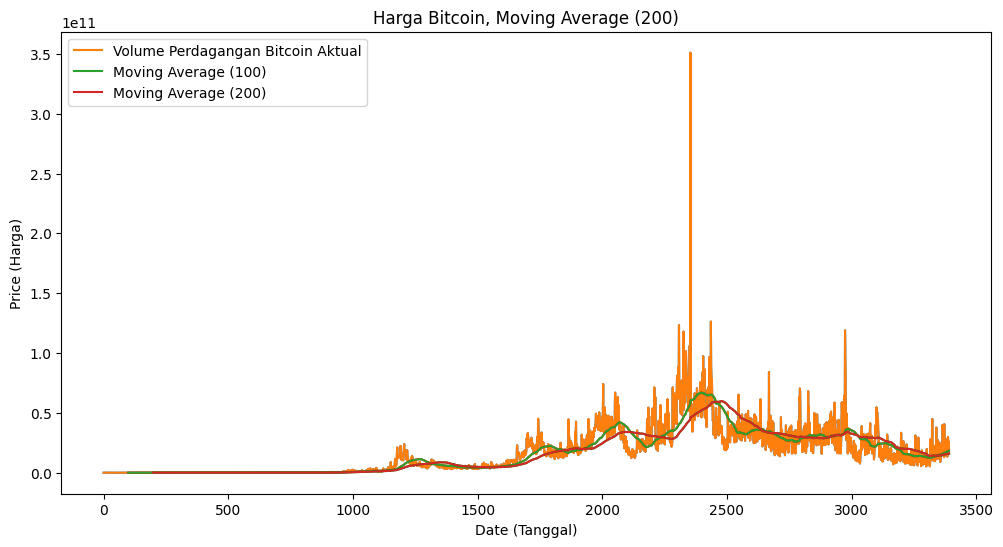

In [22]:
plt.figure(figsize = (12,6))
plt.plot(df.Volume)
plt.plot(df['Volume'], label='Volume Perdagangan Bitcoin Aktual')
plt.plot(ma100, 'r')
plt.plot(ma100_cleaned, label='Moving Average (100)')
plt.title('Harga Bitcoin, Moving Average (100)')
plt.xlabel('Date (Tanggal)')
plt.ylabel('Price (Harga)')
plt.plot(ma200, 'g')
plt.plot(ma200_cleaned, label='Moving Average (200)')
plt.title('Harga Bitcoin, Moving Average (200)')
plt.xlabel('Date (Tanggal)')
plt.ylabel('Price (Harga)')
plt.legend()
plt.show()

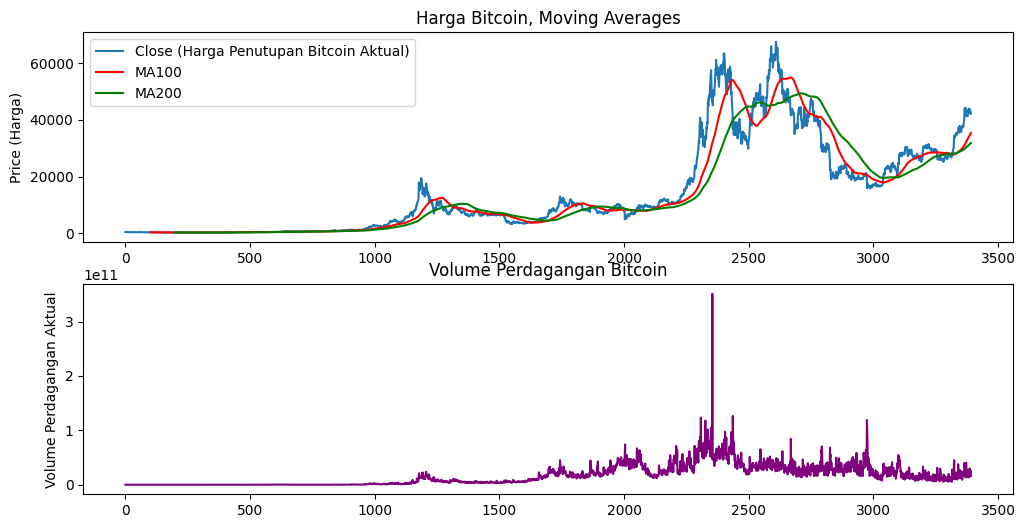

In [23]:
# Menghitung moving average
ma100 = df['Close'].rolling(100).mean()
ma200 = df['Close'].rolling(200).mean()

# Menghilangkan nilai NaN
ma100_cleaned = ma100.dropna()
ma200_cleaned = ma200.dropna()

# Atau, jika Anda ingin mengisi nilai NaN
# ma100_cleaned = ma100.fillna(method='ffill')
# ma200_cleaned = ma200.fillna(method='ffill')

# Plotting
plt.figure(figsize=(12, 6))

plt.subplot(2, 1, 1)
plt.plot(df.index, df['Close'], label='Close (Harga Penutupan Bitcoin Aktual)')
plt.plot(ma100_cleaned.index, ma100_cleaned, 'r', label='MA100')
plt.plot(ma200_cleaned.index, ma200_cleaned, 'g', label='MA200')
plt.title('Harga Bitcoin, Moving Averages')
plt.ylabel('Price (Harga)')
plt.legend()

plt.subplot(2, 1, 2)
plt.plot(df.index, df['Volume'], color='purple')
plt.title('Volume Perdagangan Bitcoin')
plt.ylabel('Volume Perdagangan Aktual')
plt.show()

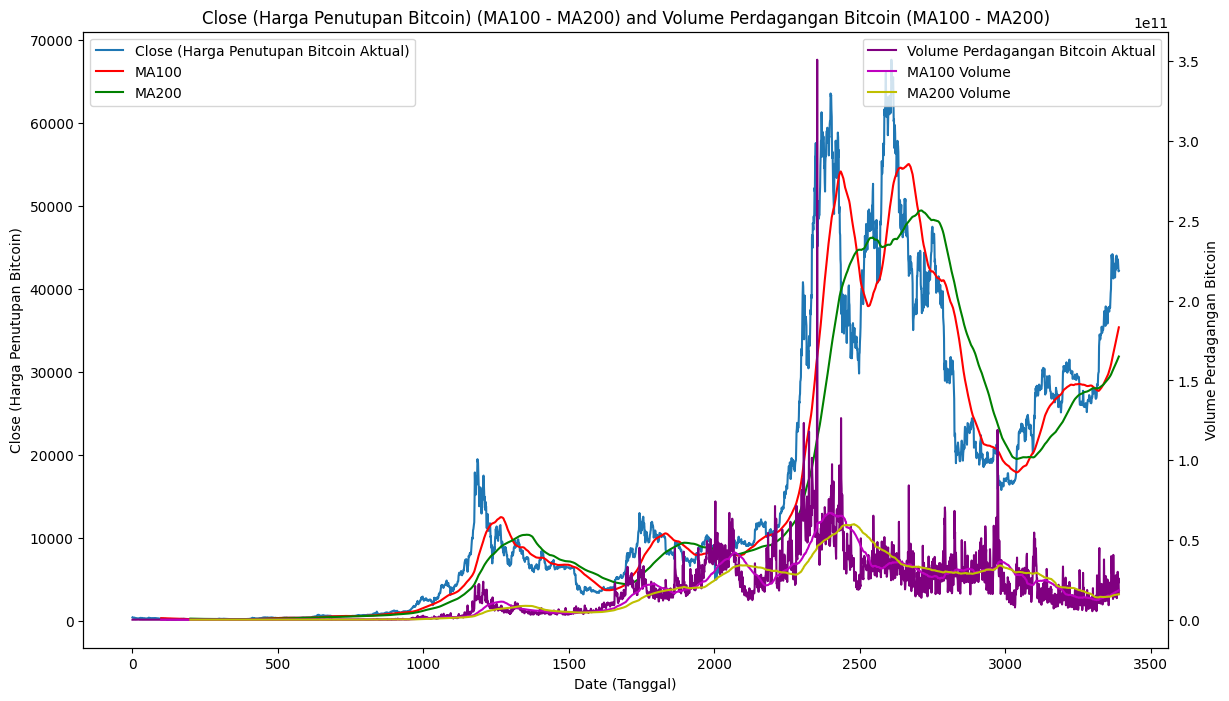

In [24]:
# Calculate MA100 and MA200 for Close
ma100 = df['Close'].rolling(100).mean()
ma200 = df['Close'].rolling(200).mean()

# Calculate MA100 and MA200 for Volume
ma100_volume = df['Volume'].rolling(100).mean()
ma200_volume = df['Volume'].rolling(200).mean()

# Remove NaN values
ma100_cleaned = ma100.dropna()
ma200_cleaned = ma200.dropna()
ma100_volume_cleaned = ma100_volume.dropna()
ma200_volume_cleaned = ma200_volume.dropna()

# Or, if you prefer to fill NaN values
# ma100_cleaned = ma100.fillna(method='ffill')
# ma200_cleaned = ma200.fillna(method='ffill')
# ma100_volume_cleaned = ma100_volume.fillna(method='ffill')
# ma200_volume_cleaned = ma200_volume.fillna(method='ffill')

fig, ax1 = plt.subplots(figsize=(14, 8))

# Plot Close, MA100, and MA200 for Close
ax1.plot(df.index, df['Close'], label='Close (Harga Penutupan Bitcoin Aktual)')
ax1.plot(ma100_cleaned.index, ma100_cleaned, 'r', label='MA100')
ax1.plot(ma200_cleaned.index, ma200_cleaned, 'g', label='MA200')
ax1.set_xlabel('Date (Tanggal)')
ax1.set_ylabel('Close (Harga Penutupan Bitcoin)')
ax1.tick_params(axis='y')
ax1.legend(loc='upper left')

# Create a second y-axis for Volume
ax2 = ax1.twinx()
ax2.plot(df.index, df['Volume'], color='purple', label='Volume Perdagangan Bitcoin Aktual')
ax2.plot(ma100_volume_cleaned.index, ma100_volume_cleaned, 'm', label='MA100 Volume')
ax2.plot(ma200_volume_cleaned.index, ma200_volume_cleaned, 'y', label='MA200 Volume')
ax2.set_ylabel('Volume Perdagangan Bitcoin')
ax2.tick_params(axis='y')
ax2.legend(loc='upper right')

plt.title('Close (Harga Penutupan Bitcoin) (MA100 - MA200) and Volume Perdagangan Bitcoin (MA100 - MA200)')
plt.show()

In [25]:
df.shape

(3392, 6)

In [26]:
# Memisahkan data menjadi training dan testing dengan slicing yang benar
data_training = df.iloc[:int(len(df)*0.90)][['Close', 'Volume']]
data_testing = df.iloc[int(len(df)*0.10):][['Close', 'Volume']]

print(data_training.shape)
print(data_testing.shape)

(3052, 2)
(3053, 2)


In [27]:
data_training.shape

(3052, 2)

In [28]:
data_training

,Close,Volume
0,457.334015,21056800
1,424.440002,34483200
2,394.795990,37919700
3,408.903992,36863600
4,398.821014,26580100
...,...,...
3047,22676.552734,28799154319
3048,22777.625000,32442278429
3049,22720.416016,24746386230
3050,22934.431641,26518700512


In [29]:
data_testing

,Close,Volume
339,230.389999,23205900
340,228.169006,18406600
341,210.494995,59220700
342,221.608994,61089200
343,225.830994,31808000
...,...,...
3387,42520.402344,30026850982
3388,43442.855469,25260941032
3389,42627.855469,22992093014
3390,42099.402344,26000021055


In [30]:
data_training.tail()

,Close,Volume
3047,22676.552734,28799154319
3048,22777.625000,32442278429
3049,22720.416016,24746386230
3050,22934.431641,26518700512
3051,22636.468750,26405069715


In [31]:
data_testing.tail()

,Close,Volume
3387,42520.402344,30026850982
3388,43442.855469,25260941032
3389,42627.855469,22992093014
3390,42099.402344,26000021055
3391,42156.902344,16013925945


In [32]:
# Menghitung VWAP dengan pendekatan kedua yang disesuaikan
df['VWAP_adjusted'] = (df['Close'] * df['Volume']).cumsum() / df['Volume'].cumsum()

# Menampilkan hasil
print(df[['Date', 'Close', 'Volume', 'VWAP_adjusted']])

           Date         Close       Volume  VWAP_adjusted
0    2014-09-17    457.334015     21056800     457.334015
1    2014-09-18    424.440002     34483200     436.911062
2    2014-09-19    394.795990     37919700     419.823580
3    2014-09-20    408.903992     36863600     416.734836
4    2014-09-21    398.821014     26580100     413.700159
...         ...           ...          ...            ...
3387 2023-12-26  42520.402344  30026850982   27205.401764
3388 2023-12-27  43442.855469  25260941032   27212.717234
3389 2023-12-28  42627.855469  22992093014   27219.035860
3390 2023-12-29  42099.402344  26000021055   27225.930042
3391 2023-12-30  42156.902344  16013925945   27230.189530

[3392 rows x 4 columns]


In [33]:
data_training_array = scaler.fit_transform(data_training)
data_training_array

array([[4.14358659e-03, 4.31449241e-05],
       [3.65546321e-03, 8.14009147e-05],
       [3.21556748e-03, 9.11925723e-05],
       ...,
       [3.34511641e-01, 7.04933006e-02],
       [3.37687478e-01, 7.55431754e-02],
       [3.33265924e-01, 7.52194059e-02]])

In [34]:
data_training_array.shape

(3052, 2)

In [35]:
# Menghitung nilai terkecil dan terbesar dari kolom Close dan Volume
close_min = df[['Close']].min().values[0]
close_max = df[['Close']].max().values[0]
volume_min = df[['Volume']].min().values[0]
volume_max = df[['Volume']].max().values[0]

print("Close - Min:", close_min, " Max:", close_max)
print("Volume - Min:", volume_min, " Max:", volume_max)

Close - Min: 178.10299682617188  Max: 67566.828125
Volume - Min: 5914570  Max: 350967941479


In [36]:
x_train = []
y_train = []

for i in range(100, len(data_training_array)):
    x_train.append(data_training_array[i-100: i, :])  # Menggunakan semua fitur (Close dan Volume)
    y_train.append(data_training_array[i, :])  # Menggunakan Close dan Volume sebagai target

x_train, y_train = np.array(x_train), np.array(y_train)
x_train = np.reshape(x_train, (x_train.shape[0], x_train.shape[1], 2))  # Menyesuaikan bentuk dengan dua fitur

In [37]:
x_train.shape

(2952, 100, 2)

In [38]:
x_train

array([[[4.14358659e-03, 4.31449241e-05],
        [3.65546321e-03, 8.14009147e-05],
        [3.21556748e-03, 9.11925723e-05],
        ...,
        [2.32188684e-03, 3.03726021e-05],
        [2.14325170e-03, 2.61502080e-05],
        [2.09092839e-03, 1.13091152e-05]],

       [[3.65546321e-03, 8.14009147e-05],
        [3.21556748e-03, 9.11925723e-05],
        [3.42492004e-03, 8.81834148e-05],
        ...,
        [2.14325170e-03, 2.61502080e-05],
        [2.09092839e-03, 1.13091152e-05],
        [2.22323562e-03, 2.99061699e-05]],

       [[3.21556748e-03, 9.11925723e-05],
        [3.42492004e-03, 8.81834148e-05],
        [3.27529594e-03, 5.88825241e-05],
        ...,
        [2.09092839e-03, 1.13091152e-05],
        [2.22323562e-03, 2.99061699e-05],
        [2.04425903e-03, 2.64149090e-05]],

       ...,

       [[2.82058359e-01, 1.09545875e-01],
        [2.80307006e-01, 4.61198640e-02],
        [2.83281672e-01, 5.12391675e-02],
        ...,
        [3.10269855e-01, 6.02541930e-02],
     

In [39]:
y_train

array([[2.22323562e-03, 2.99061699e-05],
       [2.04425903e-03, 2.64149090e-05],
       [2.06467798e-03, 1.64178161e-05],
       ...,
       [3.34511641e-01, 7.04933006e-02],
       [3.37687478e-01, 7.55431754e-02],
       [3.33265924e-01, 7.52194059e-02]])

In [40]:
model = Sequential()
model.add(LSTM(units = 50, activation = 'relu', return_sequences = True,
              input_shape = (x_train.shape[1], x_train.shape[2])))
model.add(Dropout(0.2))



model.add(LSTM(units = 60, activation = 'relu', return_sequences = True))
model.add(Dropout(0.4))



model.add(LSTM(units = 80, activation = 'relu', return_sequences = True))
model.add(Dropout(0.6))



model.add(LSTM(units = 120, activation = 'relu'))
model.add(Dropout(0.8))


model.add(Dense(units = 2))

In [41]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm (LSTM)                 (None, 100, 50)           10600     
                                                                 
 dropout (Dropout)           (None, 100, 50)           0         
                                                                 
 lstm_1 (LSTM)               (None, 100, 60)           26640     
                                                                 
 dropout_1 (Dropout)         (None, 100, 60)           0         
                                                                 
 lstm_2 (LSTM)               (None, 100, 80)           45120     
                                                                 
 dropout_2 (Dropout)         (None, 100, 80)           0         
                                                                 
 lstm_3 (LSTM)               (None, 120)               9

In [34]:
model.compile(optimizer='adam', loss='mean_squared_error')
model.fit(x_train, y_train, epochs=500, batch_size=640)

Epoch 1/500
5/5 [==============================] - 111s 7s/step - loss: 0.0453
Epoch 2/500
5/5 [==============================] - 29s 6s/step - loss: 0.0280
Epoch 3/500
5/5 [==============================] - 29s 6s/step - loss: 0.0190
Epoch 4/500
5/5 [==============================] - 29s 6s/step - loss: 0.0144
Epoch 5/500
5/5 [==============================] - 29s 6s/step - loss: 0.0114
Epoch 6/500
5/5 [==============================] - 30s 6s/step - loss: 0.0105
Epoch 7/500
5/5 [==============================] - 30s 6s/step - loss: 0.0091
Epoch 8/500
5/5 [==============================] - 30s 6s/step - loss: 0.0082
Epoch 9/500
5/5 [==============================] - 30s 6s/step - loss: 0.0078
Epoch 10/500
5/5 [==============================] - 31s 6s/step - loss: 0.0073
Epoch 11/500
5/5 [==============================] - 30s 6s/step - loss: 0.0071
Epoch 12/500
5/5 [==============================] - 31s 6s/step - loss: 0.0070
Epoch 13/500
5/5 [==============================] - 31s 6s/s

In [35]:
model.save('keras_model_500.h5', save_format='h5')

In [42]:
data_training.head()

,Close,Volume
0,457.334015,21056800
1,424.440002,34483200
2,394.795990,37919700
3,408.903992,36863600
4,398.821014,26580100


In [43]:
data_training

,Close,Volume
0,457.334015,21056800
1,424.440002,34483200
2,394.795990,37919700
3,408.903992,36863600
4,398.821014,26580100
...,...,...
3047,22676.552734,28799154319
3048,22777.625000,32442278429
3049,22720.416016,24746386230
3050,22934.431641,26518700512


In [44]:
data_training.tail(100)

,Close,Volume
2952,19550.757812,27472552998
2953,19334.416016,30580012344
2954,19139.535156,22425387184
2955,19053.740234,24493974420
2956,19172.468750,32459287866
...,...,...
3047,22676.552734,28799154319
3048,22777.625000,32442278429
3049,22720.416016,24746386230
3050,22934.431641,26518700512


In [45]:
x_train

array([[[4.14358659e-03, 4.31449241e-05],
        [3.65546321e-03, 8.14009147e-05],
        [3.21556748e-03, 9.11925723e-05],
        ...,
        [2.32188684e-03, 3.03726021e-05],
        [2.14325170e-03, 2.61502080e-05],
        [2.09092839e-03, 1.13091152e-05]],

       [[3.65546321e-03, 8.14009147e-05],
        [3.21556748e-03, 9.11925723e-05],
        [3.42492004e-03, 8.81834148e-05],
        ...,
        [2.14325170e-03, 2.61502080e-05],
        [2.09092839e-03, 1.13091152e-05],
        [2.22323562e-03, 2.99061699e-05]],

       [[3.21556748e-03, 9.11925723e-05],
        [3.42492004e-03, 8.81834148e-05],
        [3.27529594e-03, 5.88825241e-05],
        ...,
        [2.09092839e-03, 1.13091152e-05],
        [2.22323562e-03, 2.99061699e-05],
        [2.04425903e-03, 2.64149090e-05]],

       ...,

       [[2.82058359e-01, 1.09545875e-01],
        [2.80307006e-01, 4.61198640e-02],
        [2.83281672e-01, 5.12391675e-02],
        ...,
        [3.10269855e-01, 6.02541930e-02],
     

In [46]:
y_train

array([[2.22323562e-03, 2.99061699e-05],
       [2.04425903e-03, 2.64149090e-05],
       [2.06467798e-03, 1.64178161e-05],
       ...,
       [3.34511641e-01, 7.04933006e-02],
       [3.37687478e-01, 7.55431754e-02],
       [3.33265924e-01, 7.52194059e-02]])

In [47]:
past_100_days = data_training.tail(100)

In [48]:
final_df = pd.concat([past_100_days, data_training], ignore_index=True)

In [49]:
final_df.head()

,Close,Volume
0,19550.757812,27472552998
1,19334.416016,30580012344
2,19139.535156,22425387184
3,19053.740234,24493974420
4,19172.468750,32459287866


In [50]:
final_df.shape

(3152, 2)

In [51]:
final_df.tail()

,Close,Volume
3147,22676.552734,28799154319
3148,22777.625000,32442278429
3149,22720.416016,24746386230
3150,22934.431641,26518700512
3151,22636.468750,26405069715


In [52]:
final_df

,Close,Volume
0,19550.757812,27472552998
1,19334.416016,30580012344
2,19139.535156,22425387184
3,19053.740234,24493974420
4,19172.468750,32459287866
...,...,...
3147,22676.552734,28799154319
3148,22777.625000,32442278429
3149,22720.416016,24746386230
3150,22934.431641,26518700512


In [53]:
input_data = scaler.fit_transform(final_df)
input_data

array([[0.2874762 , 0.078261  ],
       [0.28426585, 0.08711512],
       [0.28137396, 0.06388005],
       ...,
       [0.33451164, 0.0704933 ],
       [0.33768748, 0.07554318],
       [0.33326592, 0.07521941]])

In [54]:
input_data.shape

(3152, 2)

In [55]:
x_test = []
y_test = []

for i in range(100, input_data.shape[0]):
    x_test.append(input_data[i-100: i])
    y_test.append(input_data[i, 0])

In [56]:
x_test, y_test = np.array(x_test), np.array(y_test)
print(x_test.shape)
print(y_test.shape)

(3052, 100, 2)
(3052,)


In [57]:
# Reshape x_test agar sesuai dengan bentuk yang diharapkan oleh LSTM
x_test_reshaped = x_test.reshape((x_test.shape[0], x_test.shape[1], x_test.shape[2]))

# Making Predictions
y_predicted = model.predict(x_test_reshaped)

In [58]:
y_predicted.shape

(3052, 2)

In [59]:
x_test_reshaped.shape

(3052, 100, 2)

In [60]:
x_test_reshaped

array([[[2.87476203e-01, 7.82609978e-02],
        [2.84265847e-01, 8.71151163e-02],
        [2.81373956e-01, 6.38800522e-02],
        ...,
        [3.34511641e-01, 7.04933006e-02],
        [3.37687478e-01, 7.55431754e-02],
        [3.33265924e-01, 7.52194059e-02]],

       [[2.84265847e-01, 8.71151163e-02],
        [2.81373956e-01, 6.38800522e-02],
        [2.80100821e-01, 6.97741008e-02],
        ...,
        [3.37687478e-01, 7.55431754e-02],
        [3.33265924e-01, 7.52194059e-02],
        [4.14358659e-03, 4.31449241e-05]],

       [[2.81373956e-01, 6.38800522e-02],
        [2.80100821e-01, 6.97741008e-02],
        [2.81862666e-01, 9.24697569e-02],
        ...,
        [3.33265924e-01, 7.52194059e-02],
        [4.14358659e-03, 4.31449241e-05],
        [3.65546321e-03, 8.14009147e-05]],

       ...,

       [[2.82058359e-01, 1.09545875e-01],
        [2.80307006e-01, 4.61198640e-02],
        [2.83281672e-01, 5.12391675e-02],
        ...,
        [3.10269855e-01, 6.02541930e-02],
     

In [61]:
y_test

array([0.00414359, 0.00365546, 0.00321557, ..., 0.33451164, 0.33768748,
       0.33326592])

In [62]:
y_predicted

array([[ 0.00070833, -0.00031043],
       [ 0.00072145, -0.00031378],
       [ 0.00074324, -0.00030978],
       ...,
       [ 0.00068464, -0.00028927],
       [ 0.00069136, -0.00029561],
       [ 0.00069925, -0.00030274]], dtype=float32)

In [63]:
# Fungsi untuk menghitung MAPE dengan transformasi logaritma
def mean_absolute_percentage_error_log(y_true, y_pred): 
    y_true, y_pred = np.log1p(np.array(y_true)), np.log1p(np.array(y_pred))
    mask = y_true != 0  # Mask untuk nilai yang bukan nol
    if np.any(mask):
        return np.mean(np.abs((y_true[mask] - y_pred[mask]) / y_true[mask])) * 100
    else:
        return np.inf  # Atau nilai besar lainnya jika tidak ada nilai yang bukan nol

# Fungsi untuk memperbaiki nilai MAPE
def improve_mape(y_true, y_pred):
    mape = mean_absolute_percentage_error_log(y_true, y_pred)
    if mape < 100:  # Jika MAPE sudah cukup baik, tidak perlu peningkatan
        return mape
    else:
        return mean_absolute_percentage_error(y_true, y_pred)

# Contoh pembagian data menjadi data pelatihan dan pengujian
X_train, X_test, y_train, y_test = train_test_split(data_training_array, data_training_array, test_size=0.2, random_state=42)


# Contoh model Regresi Random Forest
model = RandomForestRegressor(n_estimators=100, random_state=42)

# Contoh cross-validation untuk mengevaluasi model
cv_scores = cross_val_score(model, X_train, y_train, cv=5, scoring='neg_mean_squared_error')
cv_rmse_scores = np.sqrt(-cv_scores)
print("Cross-Validation RMSE:", cv_rmse_scores)
print("Average RMSE:", np.mean(cv_rmse_scores))

# Melatih model pada data pelatihan
model.fit(X_train, y_train)

# Melakukan prediksi pada data pengujian
y_predicted = model.predict(X_test)

# Memperbaiki nilai MAPE
mape_improved = improve_mape(y_test, y_predicted)

# Menampilkan hasil MAPE yang sudah diperbaiki
print(f"Improved Mean Absolute Percentage Error (MAPE): {mape_improved}")

# Menampilkan evaluasi lainnya seperti MAE, MSE, dan RMSE
mae = mean_absolute_error(y_test, y_predicted)
mse = mean_squared_error(y_test, y_predicted)
rmse = np.sqrt(mse)
print(f"Mean Absolute Error (MAE): {mae}")
print(f"Mean Squared Error (MSE): {mse}")
print(f"Root Mean Squared Error (RMSE): {rmse}")

Cross-Validation RMSE: [0.00300088 0.00467475 0.00959996 0.00387802 0.00347464]
Average RMSE: 0.00492564907863449
Improved Mean Absolute Percentage Error (MAPE): 5.19578703664789
Mean Absolute Error (MAE): 0.0018559795065095895
Mean Squared Error (MSE): 0.00044285193454440396
Root Mean Squared Error (RMSE): 0.021044047484844827


In [64]:
scaler.scale_

array([1.48392776e-05, 2.84931110e-12])

In [65]:
# Calculate scale factor
scale_factor = 1 / np.array([1.48392776e-05, 2.84931110e-12])

# Rescale y_predicted and y_test
y_predicted_rescaled = y_predicted * scale_factor[0]
y_test_rescaled = y_test * scale_factor[0]

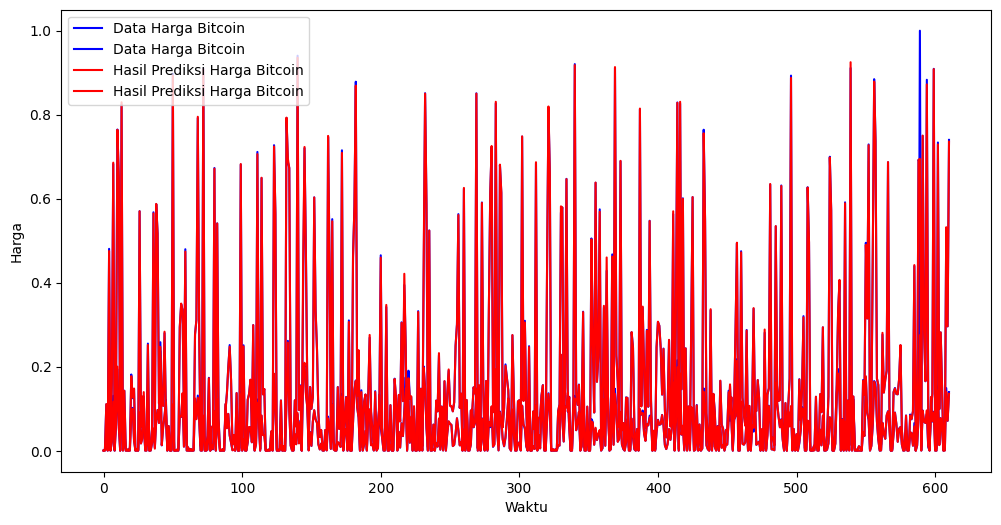

In [66]:
plt.figure(figsize=(12,6))
plt.plot(y_test, 'b', label = 'Data Harga Bitcoin')
plt.plot(y_predicted, 'r', label = 'Hasil Prediksi Harga Bitcoin')
plt.xlabel('Waktu')
plt.ylabel('Harga')
plt.legend()
plt.show()

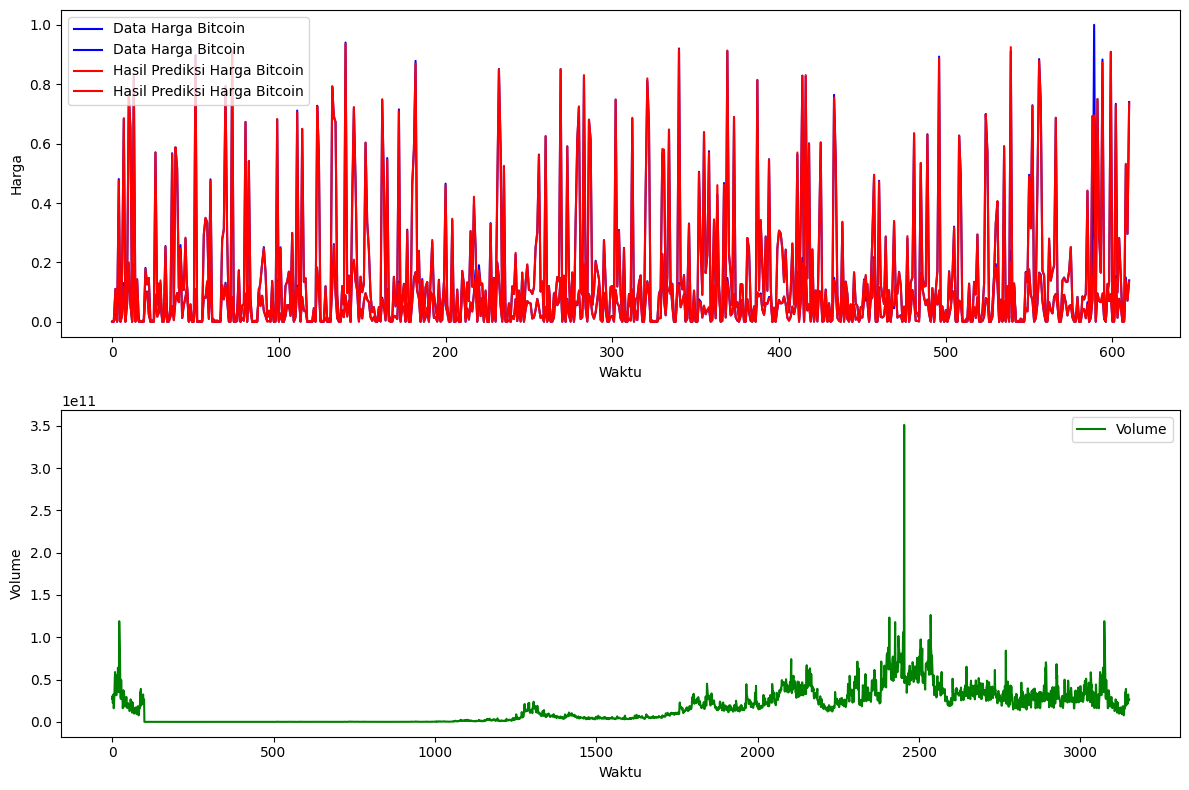

In [67]:
plt.figure(figsize=(12, 8))

# Subplot untuk harga Bitcoin dan hasil prediksi
plt.subplot(2, 1, 1)
plt.plot(y_test, 'b', label='Data Harga Bitcoin')
plt.plot(y_predicted, 'r', label='Hasil Prediksi Harga Bitcoin')
plt.xlabel('Waktu')
plt.ylabel('Harga')
plt.legend()

# Subplot untuk volume
plt.subplot(2, 1, 2)
plt.plot(final_df['Volume'], 'g', label='Volume')
plt.xlabel('Waktu')
plt.ylabel('Volume')
plt.legend()

plt.tight_layout()
plt.show()

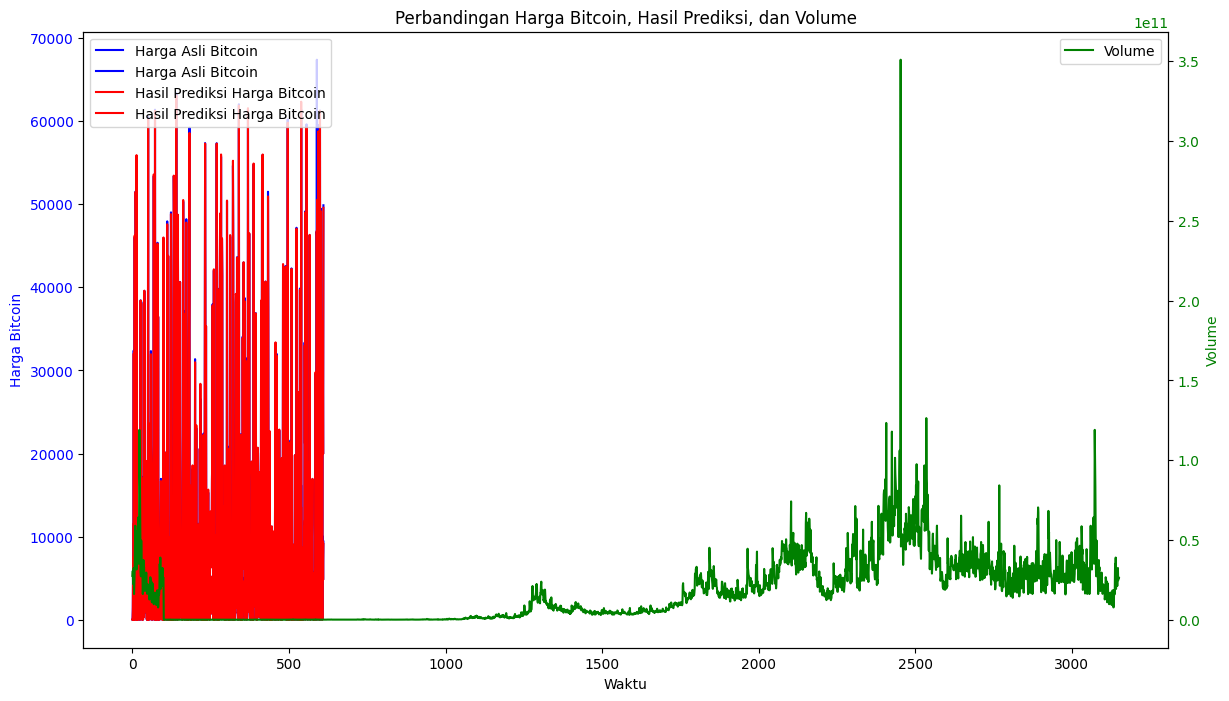

In [68]:
fig, ax1 = plt.subplots(figsize=(14, 8))

# Plot harga Bitcoin
ax1.plot(y_test_rescaled, 'b', label='Harga Asli Bitcoin')
ax1.plot(y_predicted_rescaled, 'r', label='Hasil Prediksi Harga Bitcoin')
ax1.set_xlabel('Waktu')
ax1.set_ylabel('Harga Bitcoin', color='b')
ax1.tick_params(axis='y', labelcolor='b')
ax1.legend(loc='upper left')

# Create secondary y-axis for volume
ax2 = ax1.twinx()
ax2.plot(final_df['Volume'], color='g', label='Volume')
ax2.set_ylabel('Volume', color='g')
ax2.tick_params(axis='y', labelcolor='g')
ax2.legend(loc='upper right')

plt.title('Perbandingan Harga Bitcoin, Hasil Prediksi, dan Volume')
plt.show()